<a href="https://colab.research.google.com/github/JanXanevo/PrototypeRecommendations/blob/main/08_gardenOfflineAprioriPNK_06_12_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Gartenprodukte aus online laden
df = pd.read_csv('/content/drive/MyDrive/BAHAG/Data/offlineGardenProducts.csv')

In [ ]:
# Gartenprodukte nach Warenkorb gruppieren
grouped_data = df.groupby('verkaufsbeleg_datum')['PRODUCT_NAME_CATEGORY'].apply(list).reset_index()

In [ ]:
# Bagging über iterieren von Vorschleife über sampling
from mlxtend.preprocessing import TransactionEncoder

result_rules = []
n = 3028734
k = 10
nk = int(np.ceil((n/k)*1.2))
# reasoning: System-RAM und Abdeckung aller Daten

for i in range(k):

  # gruppieren um zu jeder Bestellung eine List von Produkten (hier PNKs) zu erhalten
  # grouped_data = df.groupby('verkaufsbeleg_datum')['PRODUCT_NAME_CATEGORY'].apply(list).reset_index()
  # für Nummern die PNK durch 'produktnr' ersetzen

  # df.groupby('PRODUCT_NAME_CATEGORY', group_keys=False).apply(lambda x: x.sample(frac=0.01))


  random_sample = grouped_data.sample(n=nk, random_state=42)


  encoder = TransactionEncoder()
  encoded_data = encoder.fit(random_sample['PRODUCT_NAME_CATEGORY']).transform(random_sample['PRODUCT_NAME_CATEGORY'])
  df_encoded = pd.DataFrame(encoded_data, columns = encoder.columns_)

  frequent_itemsets = apriori(df_encoded, min_support=0.004, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

  result_rules.append(rules)



combined_rules = pd.concat(result_rules, ignore_index=True)

print(combined_rules)


In [ ]:
df_rules = pd.DataFrame(combined_rules)
df_rules = df_rules[['antecedents','consequents']]

In [ ]:
!pip install networkx

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

df_exploded = df_rules.explode('antecedents').explode('consequents')

# Erstelle einen gerichteten Graphen
G = nx.from_pandas_edgelist(df_exploded, 'antecedents', 'consequents', create_using=nx.Graph())

# Durchlaufe den Graphen und erstelle für jede verbundene Komponente eine Zeile im DataFrame
components = [set(component) for component in nx.connected_components(G)]
df_projects = pd.DataFrame({'Projekt': [f'Projekt{i+1}' for i in range(len(components))],
                          'VerbundeneKnoten': components})

# Zeige das resultierende DataFrame an
print(df_projects)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


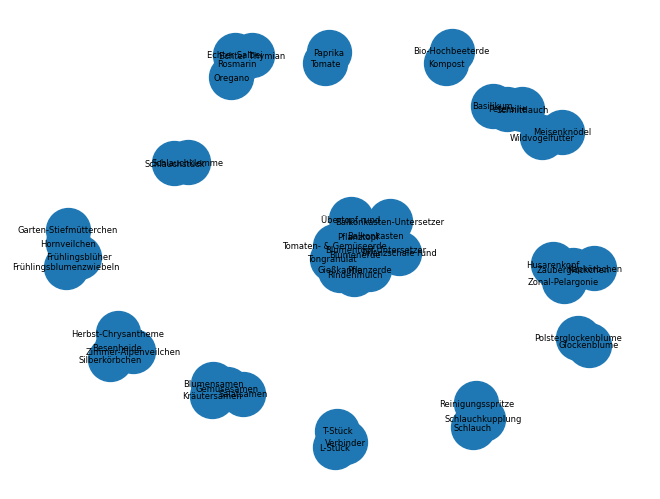

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=6)

In [ ]:
new_data = []

for index, row in df_projects.iterrows():
    project = row['Projekt']
    connected_nodes = row['VerbundeneKnoten']

    for node in connected_nodes:
        new_data.append({'Projekt': project, 'VerbundenerKnoten': node})

# Neues DataFrame erstellen
projects_ungrouped = pd.DataFrame(new_data)


In [ ]:
projects_path ='/content/drive/My Drive/BAHAG/Data/projectsGardenOffline.csv'
df_projects.to_csv(projects_path, index=False)

projects_ungrouped_path = '/content/drive/My Drive/BAHAG/Data/projectsUngroupedGardenOffline.csv'
projects_ungrouped.to_csv(projects_ungrouped_path, index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
